# Prepare a model Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:/assingment/Random forest assignment/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
df[df.duplicated()].shape

(0, 11)

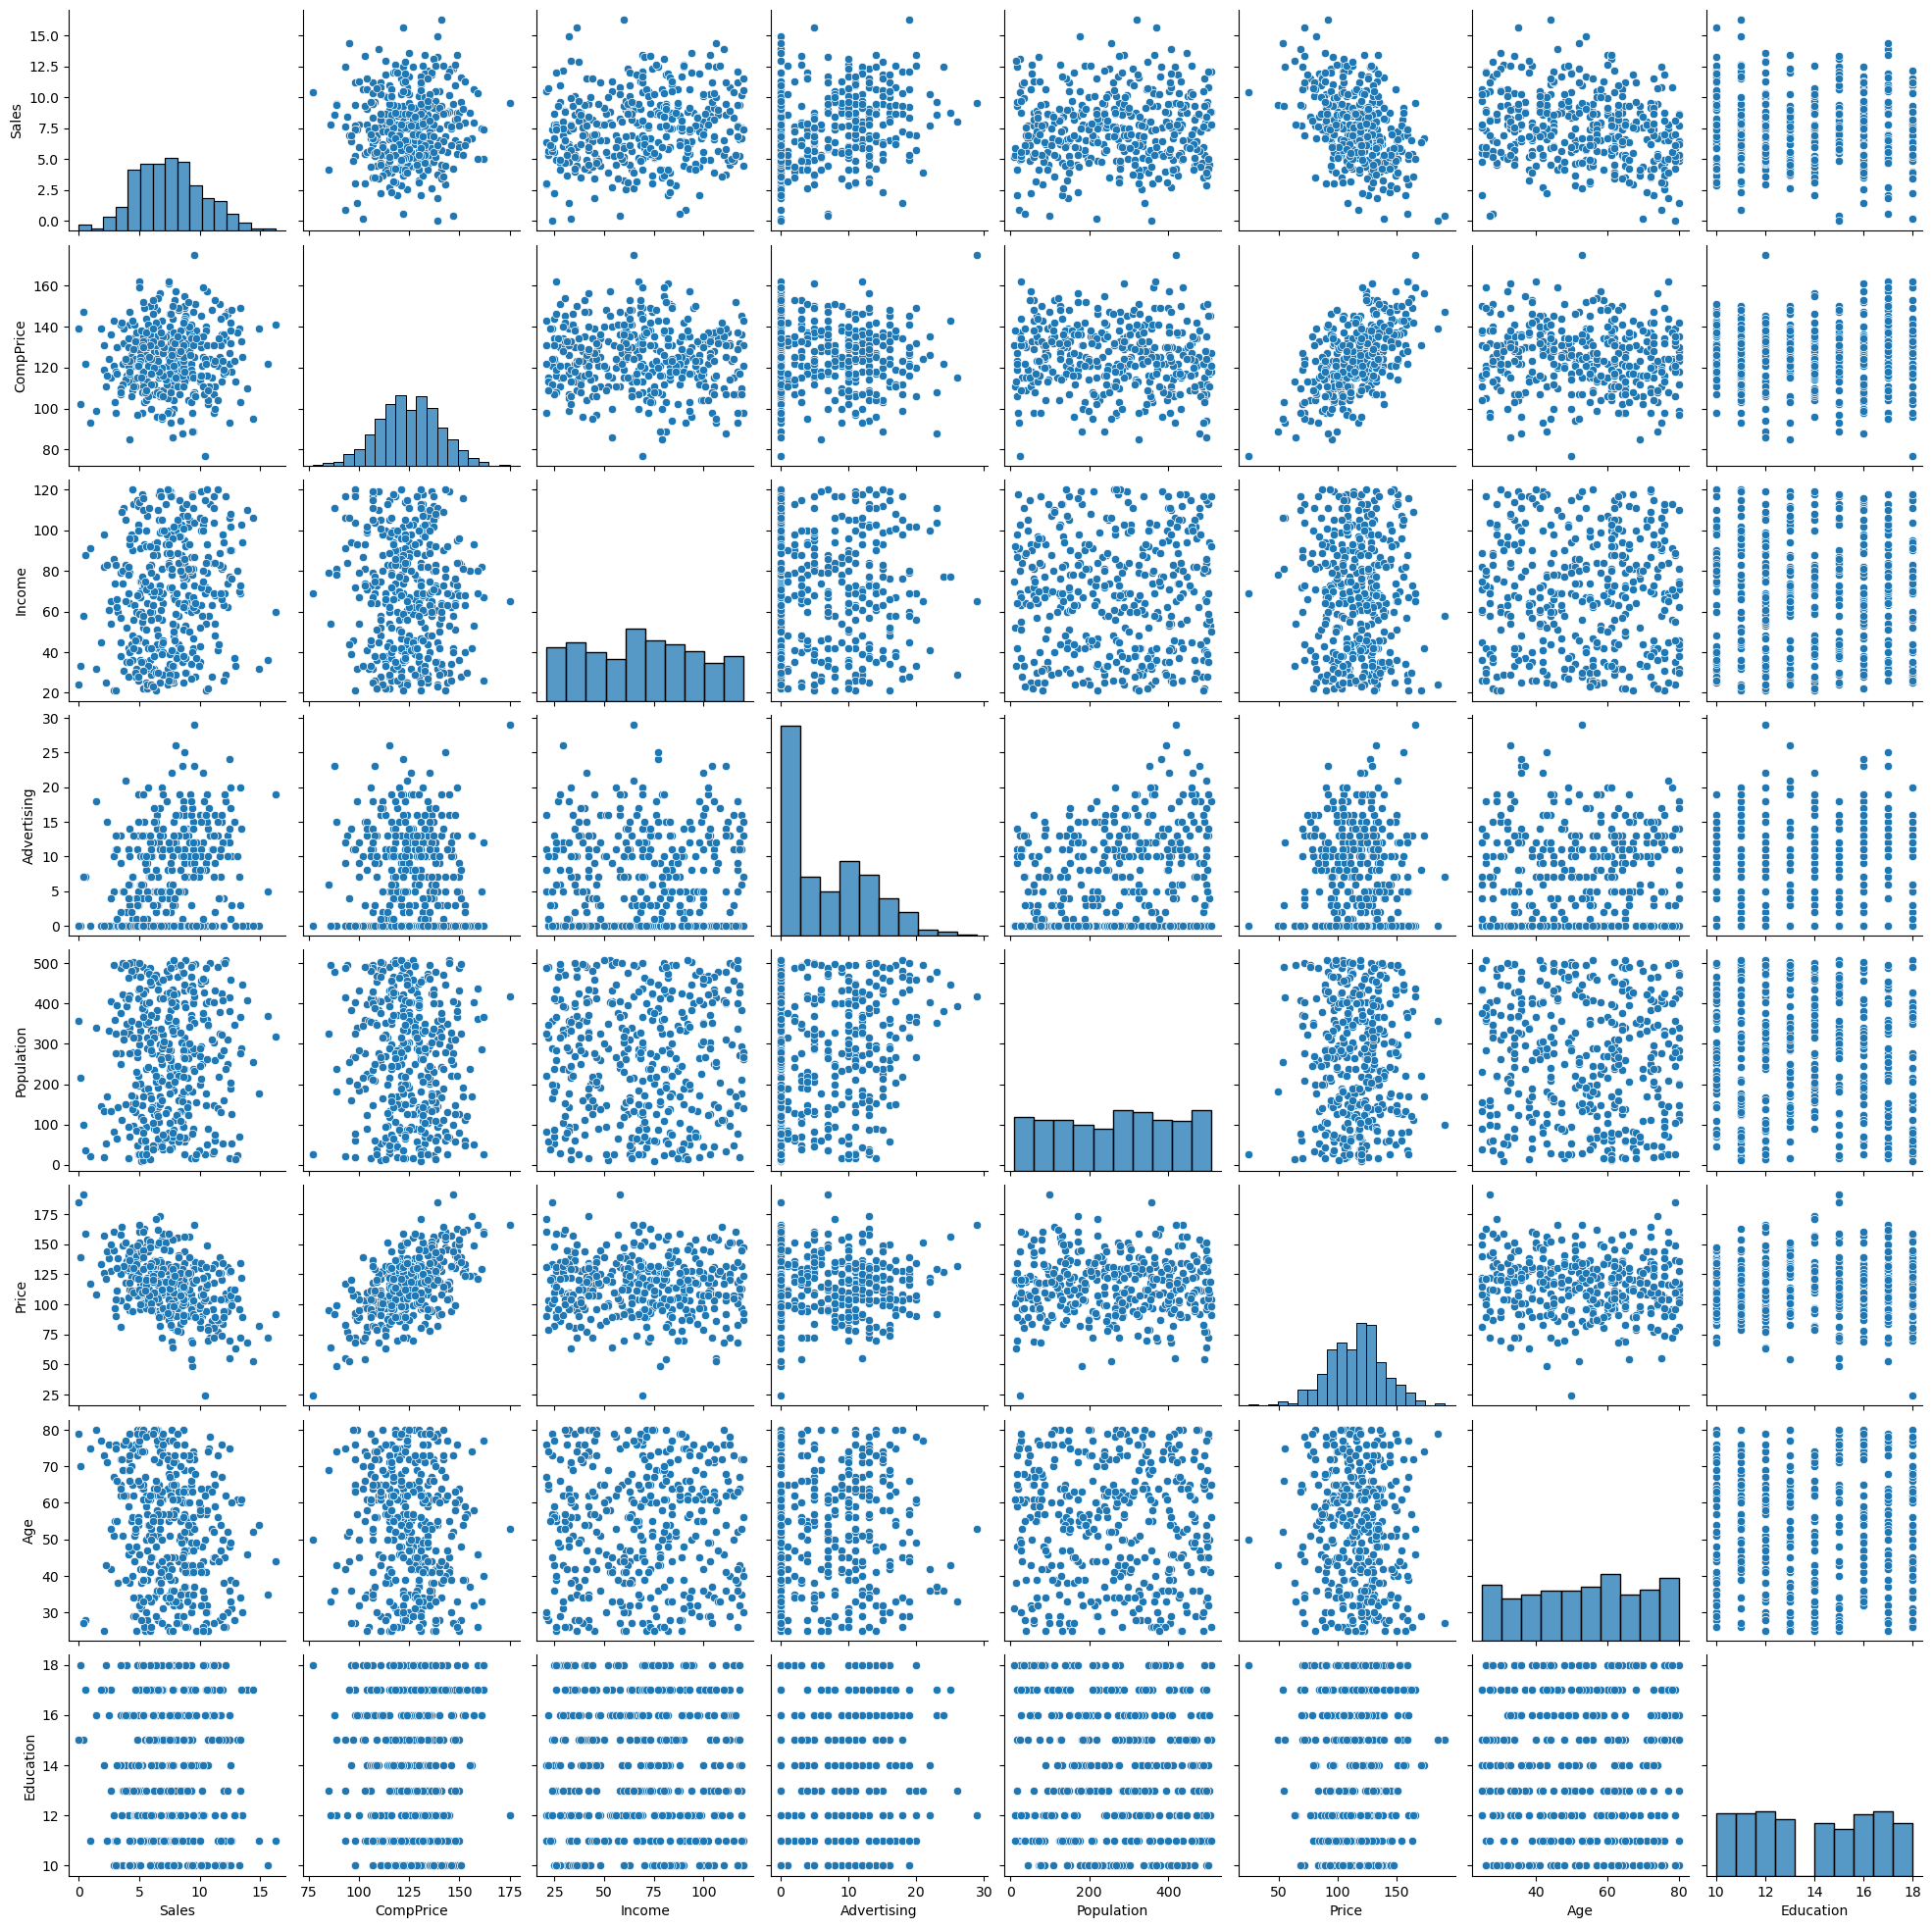

In [10]:
# pairplot
import seaborn as sns
sns.pairplot(df)

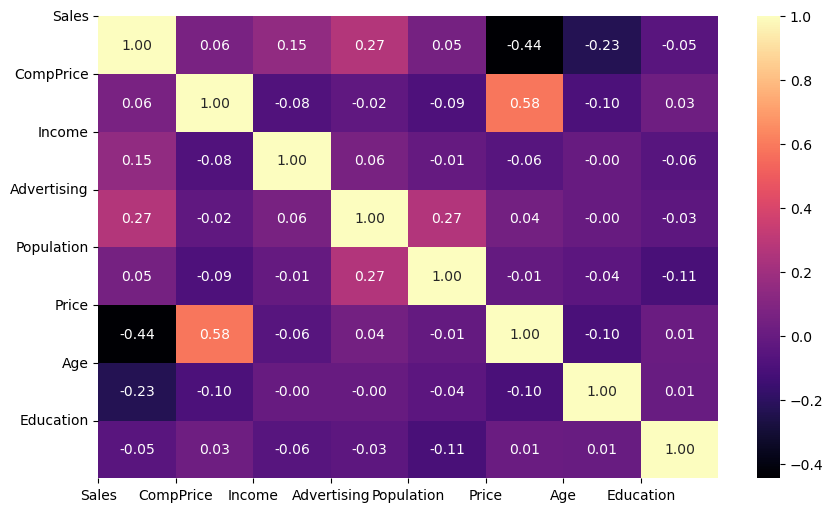

In [11]:
# Correlation analysis for data
import matplotlib.pyplot as plt
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

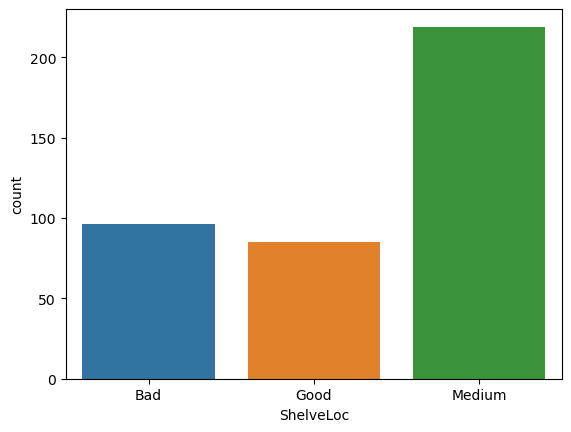

In [12]:
# checking count of categories for categorical columns colums
sns.countplot(df['ShelveLoc'])
plt.show()

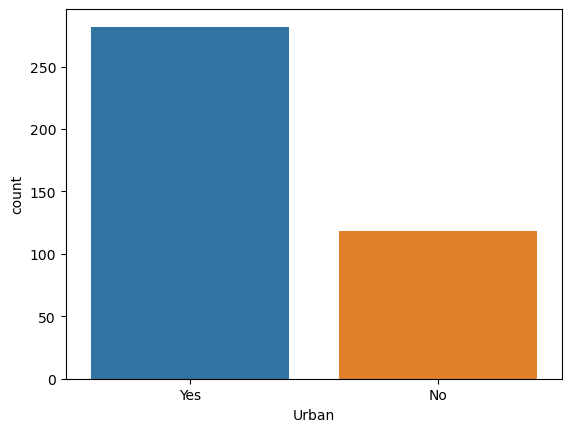

In [13]:
sns.countplot(df['Urban'])
plt.show()

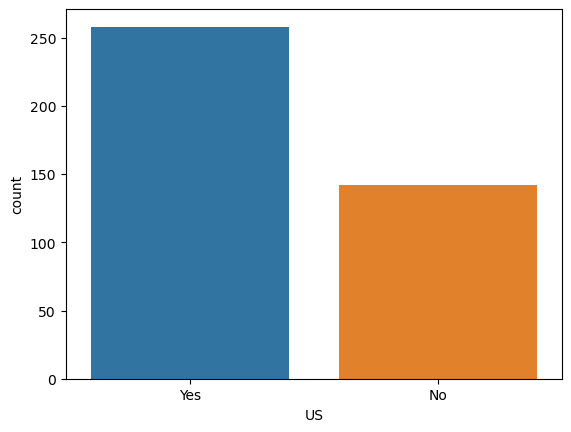

In [14]:
sns.countplot(df['US'])
plt.show()

In [15]:
df1=df.copy()

In [16]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [17]:
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [18]:
X=df.drop(["ShelveLoc","Urban","US","Sales"],axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X1=SS.fit_transform(X)

In [20]:
X1

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  0.17782345,
        -0.69978222,  1.18444912],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.38685375,
         0.72172284, -1.4901134 ],
       [-0.78189624, -1.20415947,  0.506621  , ..., -1.51371947,
         0.35089544, -0.72595268],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.82707779,
        -0.82339136,  1.56652948],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.87939087,
        -0.20534568, -0.72595268],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.17782345,
        -0.26715025,  0.80236876]])

In [21]:
X1=pd.DataFrame(X1)

In [22]:
X1

,0,1,2,3,4,5,6
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872
...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953


In [23]:
X1.columns=[ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education']

In [24]:
X1

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872
...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953


In [25]:
Z=df1[["Urban","US","ShelveLoc"]]
Z.head()

,Urban,US,ShelveLoc
0,Yes,Yes,Bad
1,Yes,Yes,Good
2,Yes,Yes,Medium
3,Yes,Yes,Medium
4,Yes,No,Bad


In [26]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [27]:
for i in range(0,3):
    Z.iloc[:,i]=LE.fit_transform(Z.iloc[:,i])

In [29]:
Z

,Urban,US,ShelveLoc
0,1,1,0
1,1,1,1
2,1,1,2
3,1,1,2
4,1,0,0
...,...,...,...
395,1,1,1
396,0,1,2
397,1,1,2
398,1,1,0


In [30]:
Z1=Z.copy()

In [31]:
Z1

,Urban,US,ShelveLoc
0,1,1,0
1,1,1,1
2,1,1,2
3,1,1,2
4,1,0,0
...,...,...,...
395,1,1,1
396,0,1,2
397,1,1,2
398,1,1,0


In [32]:
X2=pd.concat([X1,Z1],axis=1)

In [33]:
X2

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,1,1,0
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,1,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,1,1,2
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,1,1,2
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,1,0,0
...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208,1,1,1
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033,0,1,2
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529,1,1,2
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953,1,1,0


In [34]:
Y=df["Sales"]

In [35]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
Y1= pd.cut(x=Y,bins=[0, 6, 12, 18], labels=['Low','Medium', 'High'])
Y1

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [36]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y2=LE.fit_transform(Y1)

In [37]:
Y2

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2,

In [38]:
Y2=pd.DataFrame(Y2)

In [39]:
Y2

,0
0,2
1,2
2,2
3,2
4,1
...,...
395,0
396,2
397,2
398,1


In [40]:
Y2.columns=["Sales"]

In [41]:
X2

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,1,1,0
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,1,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,1,1,2
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,1,1,2
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,1,0,0
...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,0.038208,1,1,1
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,-1.108033,0,1,2
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,1.566529,1,1,2
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,-0.725953,1,1,0


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X2,Y2, test_size=0.3, random_state=44)

In [43]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(max_samples=0.4,n_estimators=120,max_features=0.7,random_state=44,max_depth=3)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_depth=3, max_features=0.7, max_samples=0.4,
                       n_estimators=120, random_state=44)

In [44]:
from sklearn.metrics import accuracy_score as ac
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

In [45]:
print("Trainning accuracy",ac(Y_train,Y_pred_train).round(2))
print("Test accuracy",ac(Y_test,Y_pred_test).round(2))

Trainning accuracy 0.75
Test accuracy 0.74


# Bagged Decision Trees for Classification

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import  DecisionTreeClassifier
skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=30)
cart = DecisionTreeClassifier()
num_trees = 150
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=30)
results = cross_val_score(model, X_train, Y_train, cv=skfolds)
print(results.mean())

0.7142857142857143


# AdaBoost Classification

In [52]:
from sklearn.ensemble import AdaBoostClassifier

skfolds=StratifiedKFold(n_splits=15, shuffle=True, random_state=40)
model = AdaBoostClassifier(n_estimators=10, random_state=40)
results = cross_val_score(model, X_train, Y_train, cv=skfolds)
print(results.mean())

0.5750487329434697
